<a href="https://colab.research.google.com/github/SammriddhGupta/ML-web-app/blob/main/Housing_EDA_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
train = pd.read_csv('https://raw.githubusercontent.com/wlifferth/build-an-ml-web-app/main/train.csv')
#test = pd.read_csv('https://raw.githubusercontent.com/wlifferth/build-an-ml-web-app/main/test.csv')

In [3]:
train.head()

,id,zipcode,city,state,dateSold,bathrooms,bedrooms,livingArea,homeType,homeStatus,lotArea,lotUnit,address,price
0,20479,76247.0,Justin,TX,1.641456e+12,3.0,4.0,3078.0,SINGLE_FAMILY,RECENTLY_SOLD,7492.32,sqft,"1937 Caddo Springs Dr, Justin, TX 76247",358100.0
1,13019,6070.0,Simsbury,CT,1.641283e+12,3.0,3.0,2200.0,CONDO,PENDING,0.00,sqft,"18 Brettonwood Dr, Simsbury, CT 06070",399900.0
2,9816,85340.0,Litchfield Park,AZ,1.641370e+12,5.0,5.0,3722.0,SINGLE_FAMILY,RECENTLY_SOLD,6577.56,sqft,"14584 W Hidden Terrace Loop, Litchfield Park, ...",660000.0
3,4479,99507.0,Anchorage,AK,1.641370e+12,2.0,3.0,1388.0,CONDO,RECENTLY_SOLD,0.00,sqft,"2903 Suncatcher Ct, Anchorage, AK 99507",232500.0
4,180,3901.0,Berwick,ME,1.640905e+12,4.0,3.0,2972.0,SINGLE_FAMILY,RECENTLY_SOLD,1.83,acres,"32 Tyler Ln, Berwick, ME 03901",551900.0


In [4]:
len(train)

23634

In [6]:
train.columns

Index(['id', 'zipcode', 'city', 'state', 'dateSold', 'bathrooms', 'bedrooms',
       'livingArea', 'homeType', 'homeStatus', 'lotArea', 'lotUnit', 'address',
       'price'],
      dtype='object')

In [7]:
# Now let us take a look at our most common values in each column
for column in train.columns:
    print(column)
    print(train[column].value_counts().nlargest(5))
    print()

id
2047     1
12995    1
693      1
6838     1
4791     1
Name: id, dtype: int64

zipcode
82001.0    103
82009.0     68
99504.0     62
99577.0     60
83709.0     56
Name: zipcode, dtype: int64

city
Anchorage       318
Louisville      224
Cheyenne        205
Las Vegas       199
Indianapolis    198
Name: city, dtype: int64

state
CT    938
IN    885
GA    862
DE    845
IA    832
Name: state, dtype: int64

dateSold
1.640851e+12    4724
1.641542e+12    3566
1.641456e+12    2444
1.641370e+12    1870
1.640765e+12    1735
Name: dateSold, dtype: int64

bathrooms
2.0    10563
3.0     6628
1.0     4018
4.0     1643
5.0      294
Name: bathrooms, dtype: int64

bedrooms
3.0    11286
4.0     5751
2.0     4161
5.0     1309
1.0      630
Name: bedrooms, dtype: int64

livingArea
1200.000000    150
1954.681419    117
1800.000000    107
960.000000      96
1400.000000     95
Name: livingArea, dtype: int64

homeType
SINGLE_FAMILY    19067
CONDO             2117
TOWNHOUSE         1922
MULTI_FAMILY       528

In [8]:
# Some useful observations
# Date sold probably isn't helpful, because we know all of these were supposed to have occurred around the same time

# HomeType is super intersting, and it's helpful to realize we're only looking at 4 kinds of homes

# homeStatus--so this is important, some of these houses haven't actually been sold. 
# We actually want to just filter out the ones that are pending, so we'll do that soon.

# Lot area--interesting to see alot of homes dont have any lot-this makes sense for condos and such

# LotUnit--this is good to know--some of our areas from above are in square feet, but others are in acres, so we'll need to unify those
# address is probably too specific to be helpful to us

# Filtering on Home Status

In [9]:
# We know we only want to look at houses that have sold,not ones that are pending. So lets filter on home status:

train_only_sold = train[train['homeStatus'] == 'RECENTLY_SOLD'].copy()

# then we can actually drop the homeStatus column because we don't need it any more

train_only_sold = train_only_sold.drop('homeStatus', axis=1)

train_only_sold.head()

,id,zipcode,city,state,dateSold,bathrooms,bedrooms,livingArea,homeType,lotArea,lotUnit,address,price
0,20479,76247.0,Justin,TX,1.641456e+12,3.0,4.0,3078.0,SINGLE_FAMILY,7492.32,sqft,"1937 Caddo Springs Dr, Justin, TX 76247",358100.0
2,9816,85340.0,Litchfield Park,AZ,1.641370e+12,5.0,5.0,3722.0,SINGLE_FAMILY,6577.56,sqft,"14584 W Hidden Terrace Loop, Litchfield Park, ...",660000.0
3,4479,99507.0,Anchorage,AK,1.641370e+12,2.0,3.0,1388.0,CONDO,0.00,sqft,"2903 Suncatcher Ct, Anchorage, AK 99507",232500.0
4,180,3901.0,Berwick,ME,1.640905e+12,4.0,3.0,2972.0,SINGLE_FAMILY,1.83,acres,"32 Tyler Ln, Berwick, ME 03901",551900.0
5,21279,80241.0,Thornton,CO,1.640851e+12,3.0,2.0,1926.0,TOWNHOUSE,0.00,sqft,"1284 E 130th Ave UNIT A, Thornton, CO 80241",435000.0


(array([ 120.,   32.,  226.,   79.,  387., 1044., 1618., 1498., 8309.,
        9835.]),
 array([1.6373088e+12, 1.6377408e+12, 1.6381728e+12, 1.6386048e+12,
        1.6390368e+12, 1.6394688e+12, 1.6399008e+12, 1.6403328e+12,
        1.6407648e+12, 1.6411968e+12, 1.6416288e+12]),
 <a list of 10 Patch objects>)

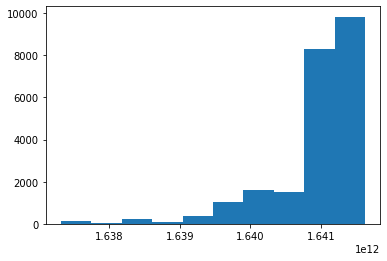

In [10]:
# We also said that we probably don't care about dateSold, but just to be sure, lets look at those values

plt.hist(train_only_sold['dateSold'])

In [11]:
# We can tell that most of these came from around the same time, and we're unlikely to get any information from this, so lets drop it as well
train_without_date = train_only_sold.drop('dateSold', axis=1)

train_without_date.head()

,id,zipcode,city,state,bathrooms,bedrooms,livingArea,homeType,lotArea,lotUnit,address,price
0,20479,76247.0,Justin,TX,3.0,4.0,3078.0,SINGLE_FAMILY,7492.32,sqft,"1937 Caddo Springs Dr, Justin, TX 76247",358100.0
2,9816,85340.0,Litchfield Park,AZ,5.0,5.0,3722.0,SINGLE_FAMILY,6577.56,sqft,"14584 W Hidden Terrace Loop, Litchfield Park, ...",660000.0
3,4479,99507.0,Anchorage,AK,2.0,3.0,1388.0,CONDO,0.00,sqft,"2903 Suncatcher Ct, Anchorage, AK 99507",232500.0
4,180,3901.0,Berwick,ME,4.0,3.0,2972.0,SINGLE_FAMILY,1.83,acres,"32 Tyler Ln, Berwick, ME 03901",551900.0
5,21279,80241.0,Thornton,CO,3.0,2.0,1926.0,TOWNHOUSE,0.00,sqft,"1284 E 130th Ave UNIT A, Thornton, CO 80241",435000.0


In [12]:
# While we're at it, lets drop address too because again it's too specific to be of use to us

train_without_address = train_without_date.drop('address', axis=1)

train_without_address.head()

,id,zipcode,city,state,bathrooms,bedrooms,livingArea,homeType,lotArea,lotUnit,price
0,20479,76247.0,Justin,TX,3.0,4.0,3078.0,SINGLE_FAMILY,7492.32,sqft,358100.0
2,9816,85340.0,Litchfield Park,AZ,5.0,5.0,3722.0,SINGLE_FAMILY,6577.56,sqft,660000.0
3,4479,99507.0,Anchorage,AK,2.0,3.0,1388.0,CONDO,0.00,sqft,232500.0
4,180,3901.0,Berwick,ME,4.0,3.0,2972.0,SINGLE_FAMILY,1.83,acres,551900.0
5,21279,80241.0,Thornton,CO,3.0,2.0,1926.0,TOWNHOUSE,0.00,sqft,435000.0


In [13]:
# Lets also drop id
train_without_id = train_without_address.drop('id', axis=1)

train_without_id.head()

,zipcode,city,state,bathrooms,bedrooms,livingArea,homeType,lotArea,lotUnit,price
0,76247.0,Justin,TX,3.0,4.0,3078.0,SINGLE_FAMILY,7492.32,sqft,358100.0
2,85340.0,Litchfield Park,AZ,5.0,5.0,3722.0,SINGLE_FAMILY,6577.56,sqft,660000.0
3,99507.0,Anchorage,AK,2.0,3.0,1388.0,CONDO,0.00,sqft,232500.0
4,3901.0,Berwick,ME,4.0,3.0,2972.0,SINGLE_FAMILY,1.83,acres,551900.0
5,80241.0,Thornton,CO,3.0,2.0,1926.0,TOWNHOUSE,0.00,sqft,435000.0


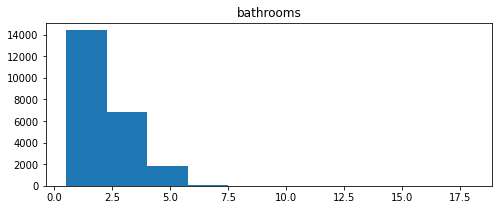

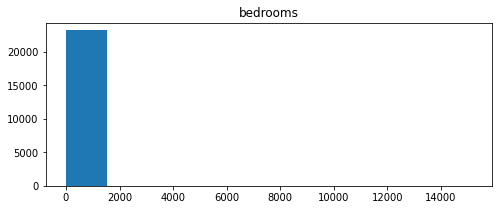

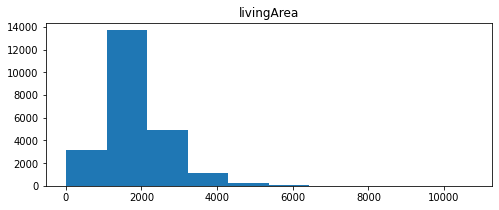

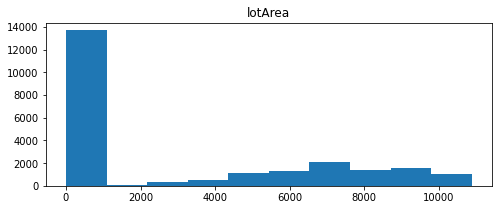

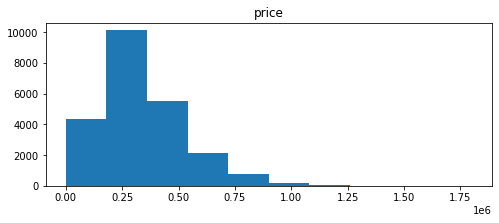

In [14]:
# Now let's graph all our numerical columns!

numerical_columns = ['bathrooms', 'bedrooms', 'livingArea', 'lotArea', 'price']

for column in numerical_columns:
    plt.figure(figsize=(8,3))
    plt.title(column)
    plt.hist(train_without_id[column])
    plt.show()

In [ ]:
# All of them are super skewed! This is usually an indicator that we have some outliers that are making analysis tricky
# There are a lot of ways to deal with outliers, but if you don't have a lot of them, one of the easiest methods is to just get rid of them!

In [15]:
# Before we get rid of them, theres some other work we should do
# Right now we have a lotArea column, but we also have a lotUnits column that tells us if the lotArea is in square feet or acres

# There are 43560 square feet in each acre, so if the units is acre, we should multiply the area by 43560
square_feet_in_acre = 43560

def convert_lot_area(row):
    if row['lotUnit'] == 'acres':
        return row['lotArea'] * square_feet_in_acre
    else:
        return row['lotArea']

train_without_id['lotArea'] = train_without_id.apply(convert_lot_area, axis=1)
train_without_id.head()

,zipcode,city,state,bathrooms,bedrooms,livingArea,homeType,lotArea,lotUnit,price
0,76247.0,Justin,TX,3.0,4.0,3078.0,SINGLE_FAMILY,7492.32,sqft,358100.0
2,85340.0,Litchfield Park,AZ,5.0,5.0,3722.0,SINGLE_FAMILY,6577.56,sqft,660000.0
3,99507.0,Anchorage,AK,2.0,3.0,1388.0,CONDO,0.00,sqft,232500.0
4,3901.0,Berwick,ME,4.0,3.0,2972.0,SINGLE_FAMILY,79714.80,acres,551900.0
5,80241.0,Thornton,CO,3.0,2.0,1926.0,TOWNHOUSE,0.00,sqft,435000.0


(array([20525.,  1294.,   502.,   236.,   175.,   205.,    94.,    46.,
           37.,    34.]),
 array([     0.  ,  43429.32,  86858.64, 130287.96, 173717.28, 217146.6 ,
        260575.92, 304005.24, 347434.56, 390863.88, 434293.2 ]),
 <a list of 10 Patch objects>)

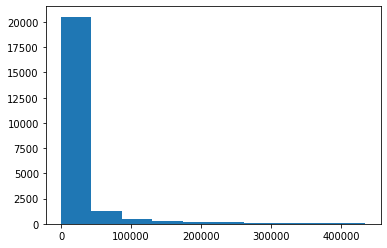

In [16]:
# This now looks a lot more normal! Most homes have small yards (or no yards) but a few have bigger yards!
plt.hist(train_without_id['lotArea'])

In [17]:
# Great! Now we're ready to deal with outliers, remember an outlier is a value that is more than 3 standard deviations away from the mean

distance_from_mean = np.abs(train_without_id['bedrooms'] - train_without_id['bedrooms'].mean())

distance_from_mean

0        0.167467
2        1.167467
3        0.832533
4        0.832533
5        1.832533
           ...   
23628    0.832533
23629    0.832533
23631    0.832533
23632    1.832533
23633    1.832533
Name: bedrooms, Length: 23148, dtype: float64

In [18]:
std_x_3 = train_without_id['bedrooms'].std() * 3

std_x_3

298.7398864510935

In [ ]:
bedrooms_without_outliers = train_without_id[distance_from_mean < std_x_3]['bedrooms']

plt.title('bedrooms with outliers')
plt.hist(train_without_id['bedrooms'])
plt.show()

plt.title('bedrooms without outliers')
plt.hist(bedrooms_without_outliers)

In [19]:
# We can get both the mean and standard deviations of our columns really easily!

train_no_outliers = train_without_id.copy()

train_no_outliers.fillna(train_no_outliers.mean())

for column in numerical_columns:
    distance_from_mean = np.abs(train_no_outliers[column].mean() - train_no_outliers[column])
    train_no_outliers = train_no_outliers[distance_from_mean < (train_no_outliers[column].std() * 5)]

In [20]:
print(f'Rows before outlier removal: {len(train_without_id)}')
print(f'Rows after outlier removal: {len(train_no_outliers)}')

Rows before outlier removal: 23148
Rows after outlier removal: 22856


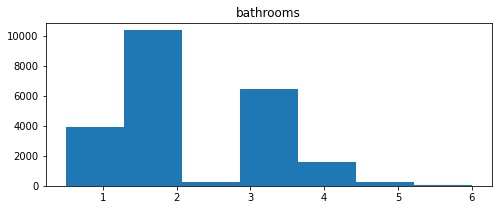

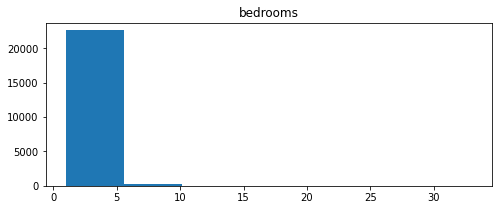

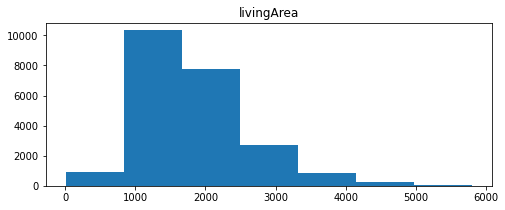

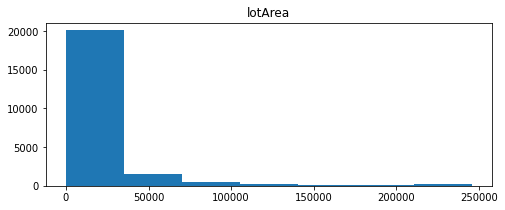

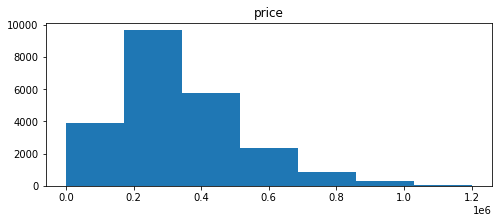

In [22]:
for column in numerical_columns:
    plt.figure(figsize=(8,3))
    plt.title(column)
    plt.hist(train_no_outliers[column], bins=7)
    plt.show()

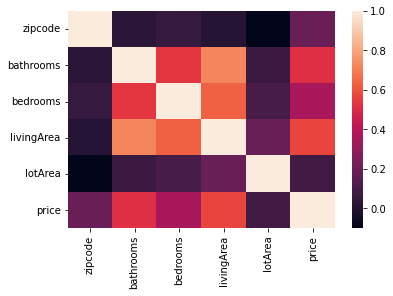

In [23]:
# Now we can do something called bivariate analysis,where we see how much two variables interact
# basically we are using seaborn to display cool graphs hehe

sns.heatmap(train_no_outliers.corr())

In [24]:
# So bathrooms and livingArea seems to be pretty moderately correlated with price, but zipcode  and lotArea are hardly correlated. 
# So we've gotten a sense for our numerical data, but now we need to figure out what we're going to do with our categorical data
# State , City , Zip Code , Home Type

In [25]:
# One strategy we can use is one-hot encoding,this strategy works best if you have a set number of values, like, under 100
# This strategy involves turning a single categorical variable with n values, into n binary variables

# Lets one-hot encode homeType!

train_one_hot = pd.get_dummies(train_no_outliers, columns=['homeType'])

train_one_hot

,zipcode,city,state,bathrooms,bedrooms,livingArea,lotArea,lotUnit,price,homeType_CONDO,homeType_MULTI_FAMILY,homeType_SINGLE_FAMILY,homeType_TOWNHOUSE
0,76247.0,Justin,TX,3.0,4.0,3078.0,7492.32,sqft,358100.0,0,0,1,0
2,85340.0,Litchfield Park,AZ,5.0,5.0,3722.0,6577.56,sqft,660000.0,0,0,1,0
3,99507.0,Anchorage,AK,2.0,3.0,1388.0,0.00,sqft,232500.0,1,0,0,0
4,3901.0,Berwick,ME,4.0,3.0,2972.0,79714.80,acres,551900.0,0,0,1,0
5,80241.0,Thornton,CO,3.0,2.0,1926.0,0.00,sqft,435000.0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23628,31204.0,Macon,GA,2.0,3.0,2428.0,7840.80,sqft,175000.0,0,0,1,0
23629,2907.0,Providence,RI,2.0,3.0,1600.0,3600.00,sqft,305000.0,0,0,1,0
23631,85302.0,Glendale,AZ,2.0,3.0,1605.0,6150.00,sqft,305000.0,0,0,1,0
23632,85138.0,Maricopa,AZ,2.0,2.0,1810.0,8713.00,sqft,360000.0,0,0,1,0


In [26]:
# Now what about zipcode?
# It really has too many values to one-hot encode effectively, and there's a chance we see new zip codes we haven't seen before

# what we can do is replace zipcode by the median income

zip_code_df = pd.read_csv('https://raw.githubusercontent.com/wlifferth/build-an-ml-web-app/main/median_income_by_zip_code.csv')

zip_code_df['median_income']

0         9419
1         9963
2        10520
3        10272
4        12352
         ...  
33115    36175
33116    22303
33117    30446
33118    36175
33119    28918
Name: median_income, Length: 33120, dtype: int64

In [27]:
zip_code_df.head()

,median_income,zip_code
0,9419,601
1,9963,602
2,10520,603
3,10272,606
4,12352,610


In [28]:
train_with_median_income = pd.merge(train_one_hot, zip_code_df, how='left', left_on='zipcode', right_on='zip_code')

train_with_median_income.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/reshape/merge.py:1117: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation
  UserWarning,


,zipcode,city,state,bathrooms,bedrooms,livingArea,lotArea,lotUnit,price,homeType_CONDO,homeType_MULTI_FAMILY,homeType_SINGLE_FAMILY,homeType_TOWNHOUSE,median_income,zip_code
0,76247.0,Justin,TX,3.0,4.0,3078.0,7492.32,sqft,358100.0,0,0,1,0,46658.0,76247.0
1,85340.0,Litchfield Park,AZ,5.0,5.0,3722.0,6577.56,sqft,660000.0,0,0,1,0,57188.0,85340.0
2,99507.0,Anchorage,AK,2.0,3.0,1388.0,0.00,sqft,232500.0,1,0,0,0,66044.0,99507.0
3,3901.0,Berwick,ME,4.0,3.0,2972.0,79714.80,acres,551900.0,0,0,1,0,46016.0,3901.0
4,80241.0,Thornton,CO,3.0,2.0,1926.0,0.00,sqft,435000.0,0,0,0,1,65217.0,80241.0


In [29]:
train_with_median_income['median_income'].fillna(train_with_median_income['median_income'].mean(), inplace=True)

train_with_median_income.drop(['zipcode', 'zip_code'], axis=1, inplace=True)

train_with_median_income

,city,state,bathrooms,bedrooms,livingArea,lotArea,lotUnit,price,homeType_CONDO,homeType_MULTI_FAMILY,homeType_SINGLE_FAMILY,homeType_TOWNHOUSE,median_income
0,Justin,TX,3.0,4.0,3078.0,7492.32,sqft,358100.0,0,0,1,0,46658.0
1,Litchfield Park,AZ,5.0,5.0,3722.0,6577.56,sqft,660000.0,0,0,1,0,57188.0
2,Anchorage,AK,2.0,3.0,1388.0,0.00,sqft,232500.0,1,0,0,0,66044.0
3,Berwick,ME,4.0,3.0,2972.0,79714.80,acres,551900.0,0,0,1,0,46016.0
4,Thornton,CO,3.0,2.0,1926.0,0.00,sqft,435000.0,0,0,0,1,65217.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22851,Macon,GA,2.0,3.0,2428.0,7840.80,sqft,175000.0,0,0,1,0,21375.0
22852,Providence,RI,2.0,3.0,1600.0,3600.00,sqft,305000.0,0,0,1,0,33125.0
22853,Glendale,AZ,2.0,3.0,1605.0,6150.00,sqft,305000.0,0,0,1,0,30005.0
22854,Maricopa,AZ,2.0,2.0,1810.0,8713.00,sqft,360000.0,0,0,1,0,50044.0
